In [1]:
import pyshtools
import matplotlib.pyplot as plt
import numpy as np
import pygmt


/opt/anaconda3/envs/pygmt7/lib/python3.8/site-packages/pyshtools/shclasses/shgrid.py:1398: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(<Figure size 432x216 with 2 Axes>,
 <AxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

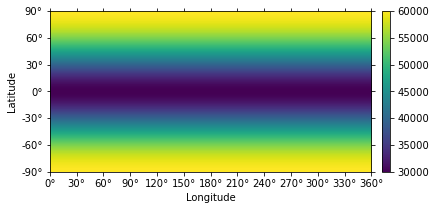

In [17]:
M = -30000
r0=6371000

axial_dipole = pyshtools.SHMagCoeffs.from_zeros(lmax=1, r0=r0)

# The first number here is the ??factor
axial_dipole.set_coeffs(M,1,0)

axial_dipole.expand(lmax=100).total.plot(colorbar='right')

(<Figure size 432x216 with 2 Axes>,
 <AxesSubplot:xlabel='Longitude', ylabel='Latitude'>)

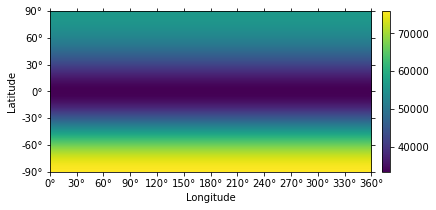

In [3]:
NAD = pyshtools.SHMagCoeffs.from_zeros(lmax=3, r0=r0)
NAD.set_coeffs(M, 1, 0)
NAD.set_coeffs(M*-0.1, 2, 0)
#NAD.set_coeffs(M*-0.15, 3, 0)

NAD.expand(lmax=100).total.plot(colorbar='right')


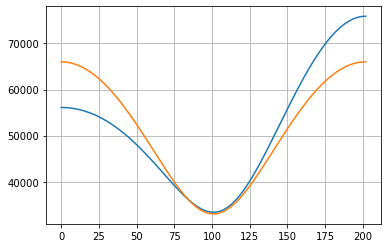

In [4]:
plt.plot(NAD.expand(lmax=100).total.to_array()[:,0])
plt.plot(axial_dipole.expand(lmax=100).total.to_array()[:,0])
plt.grid()

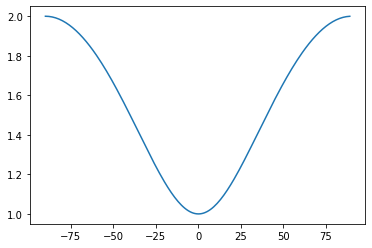

In [5]:
paleolatitude = np.arange(-90,90,1)
C = np.sqrt(1+(3*np.sin((paleolatitude) * np.pi/180)**2))

plt.plot(paleolatitude, C)

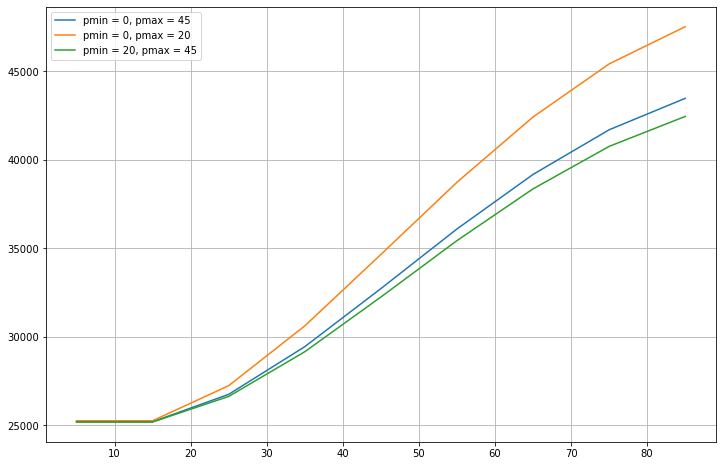

In [6]:
# From Muxworthy (2007), section on Cap models for dipolar secular variation
# cf his figure 2

#B_eq = 25000.

def cap_model(pmin, pmax, B_eq=25000, lat_bin_size=10):
    pmin = np.radians(pmin)
    pmax = np.radians(pmax)
    #lat_bin_size = 10
    lat_bins = np.arange(0,90.,lat_bin_size)

    B_by_latitude = []

    for lat_bin in lat_bins:
        smin = np.radians(90-lat_bin)
        smax = np.radians(90-lat_bin+lat_bin_size)

        cosg = (1/16) * ((np.cos(2*pmin) - np.cos(2*pmax)) / (np.cos(pmin)-np.cos(pmax))) \
                         * ((np.cos(2*smin) - np.cos(2*smax)) / (np.cos(smin) - np.cos(smax)))  

        B = B_eq * (1 + 3*cosg**2)**0.5
        B_by_latitude.append(B)
        
    return B_by_latitude
   
lat_bin_size = 10   
lat_bin_centers = np.arange(lat_bin_size/2,90.,lat_bin_size)

plt.figure(figsize=(12,8))
plt.plot(lat_bin_centers,cap_model(pmin=0, pmax=45, lat_bin_size=lat_bin_size), label='pmin = 0, pmax = 45')
plt.plot(lat_bin_centers,cap_model(pmin=0, pmax=20, lat_bin_size=lat_bin_size), label='pmin = 0, pmax = 20')
plt.plot(lat_bin_centers,cap_model(pmin=20, pmax=45, lat_bin_size=lat_bin_size), label='pmin = 20, pmax = 45')
#plt.plot(lat_bin_centers,cap_model(pmin=0, pmax=0, lat_bin_size=lat_bin_size), label='pmin = 0, pmax = 1')
plt.legend()
plt.grid()
plt.show()


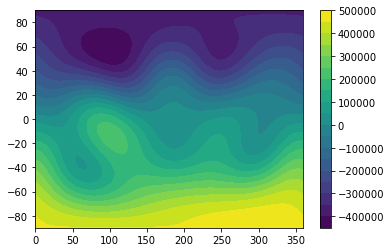

In [7]:
KG97 = pyshtools.SHMagCoeffs.from_zeros(lmax=4, r0=r0)

KG97.set_coeffs(-0.3e5, 1, 0)

KG97.set_coeffs(0.475e3, 1, 1)
KG97.set_coeffs(0.257e3, 1, -1)

KG97.set_coeffs(-0.126e4, 2, 0)
KG97.set_coeffs(-0.195e3, 2, 1)
KG97.set_coeffs(-0.505e3, 2, -1)
KG97.set_coeffs(0.116e3, 2, 2)
KG97.set_coeffs(-0.384e3, 2, -2)

KG97.set_coeffs(-0.886e3, 3, 0)
KG97.set_coeffs(0.322e3, 3, 1)
KG97.set_coeffs(-0.106e4, 3, -1)
KG97.set_coeffs(0.209e3, 3, 2)
KG97.set_coeffs(0.911e2, 3, -2)
KG97.set_coeffs(0.232e3, 3, 3)
KG97.set_coeffs(-0.340e3, 3, -3)

KG97.set_coeffs(0.529e3, 4, 0)
KG97.set_coeffs(0.156e2, 4, 1)
KG97.set_coeffs(0.208e3, 4, -1)
KG97.set_coeffs(0.559e3, 4, 2)
KG97.set_coeffs(-0.165e3, 4, -2)
KG97.set_coeffs(-0.499e3, 4, 3)
KG97.set_coeffs(-0.365e2, 4, -3)
KG97.set_coeffs(0.134e3, 4, 4)
KG97.set_coeffs(-0.397e2, 4, -4)

rad = KG97.expand(lmax=100, a=r0-2800000.).rad.to_xarray()
plt.contourf(rad.lon, rad.lat, rad, levels=20) #np.arange(-3e8,3e8,100000))
plt.colorbar()

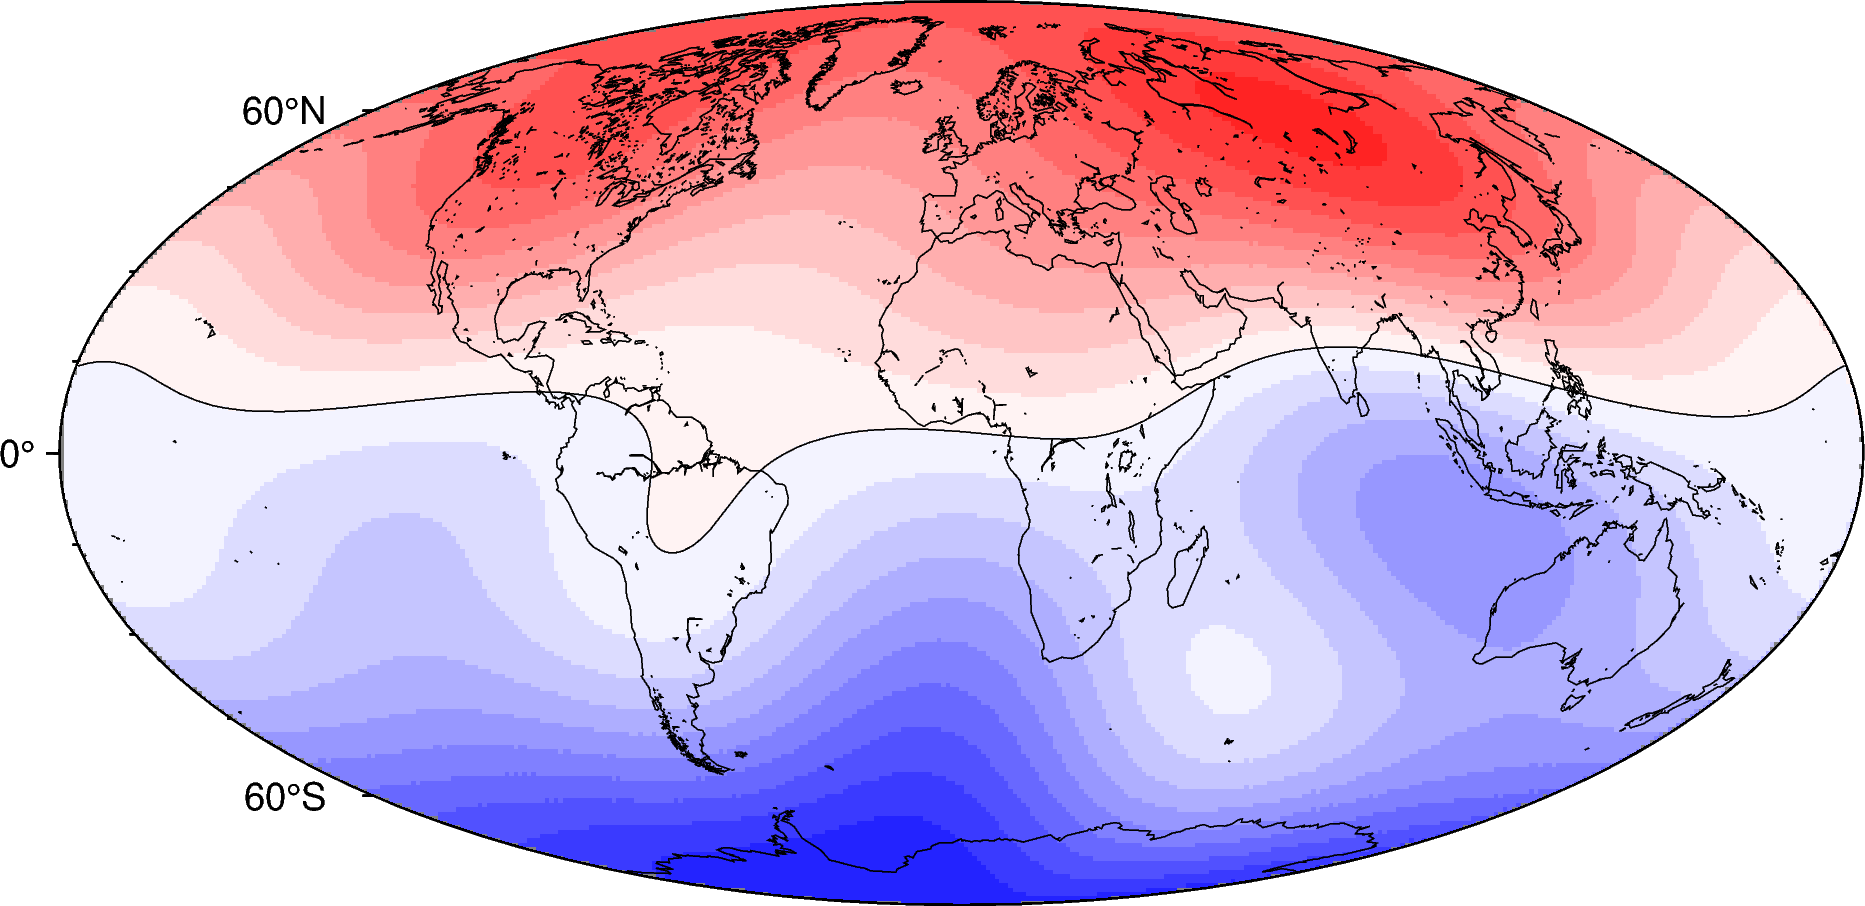

In [8]:
rad = KG97.expand(lmax=100, a=r0-2850000.).rad.to_xarray()

fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')

pygmt.makecpt(cmap='polar', series=[-550000,550000,50000], background='o',reverse=True)
fig.grdimage(grid=rad, cmap=True)
fig.grdcontour(grid=rad, interval='0,')
fig.coast(shorelines='black')

fig.show(width=1000)


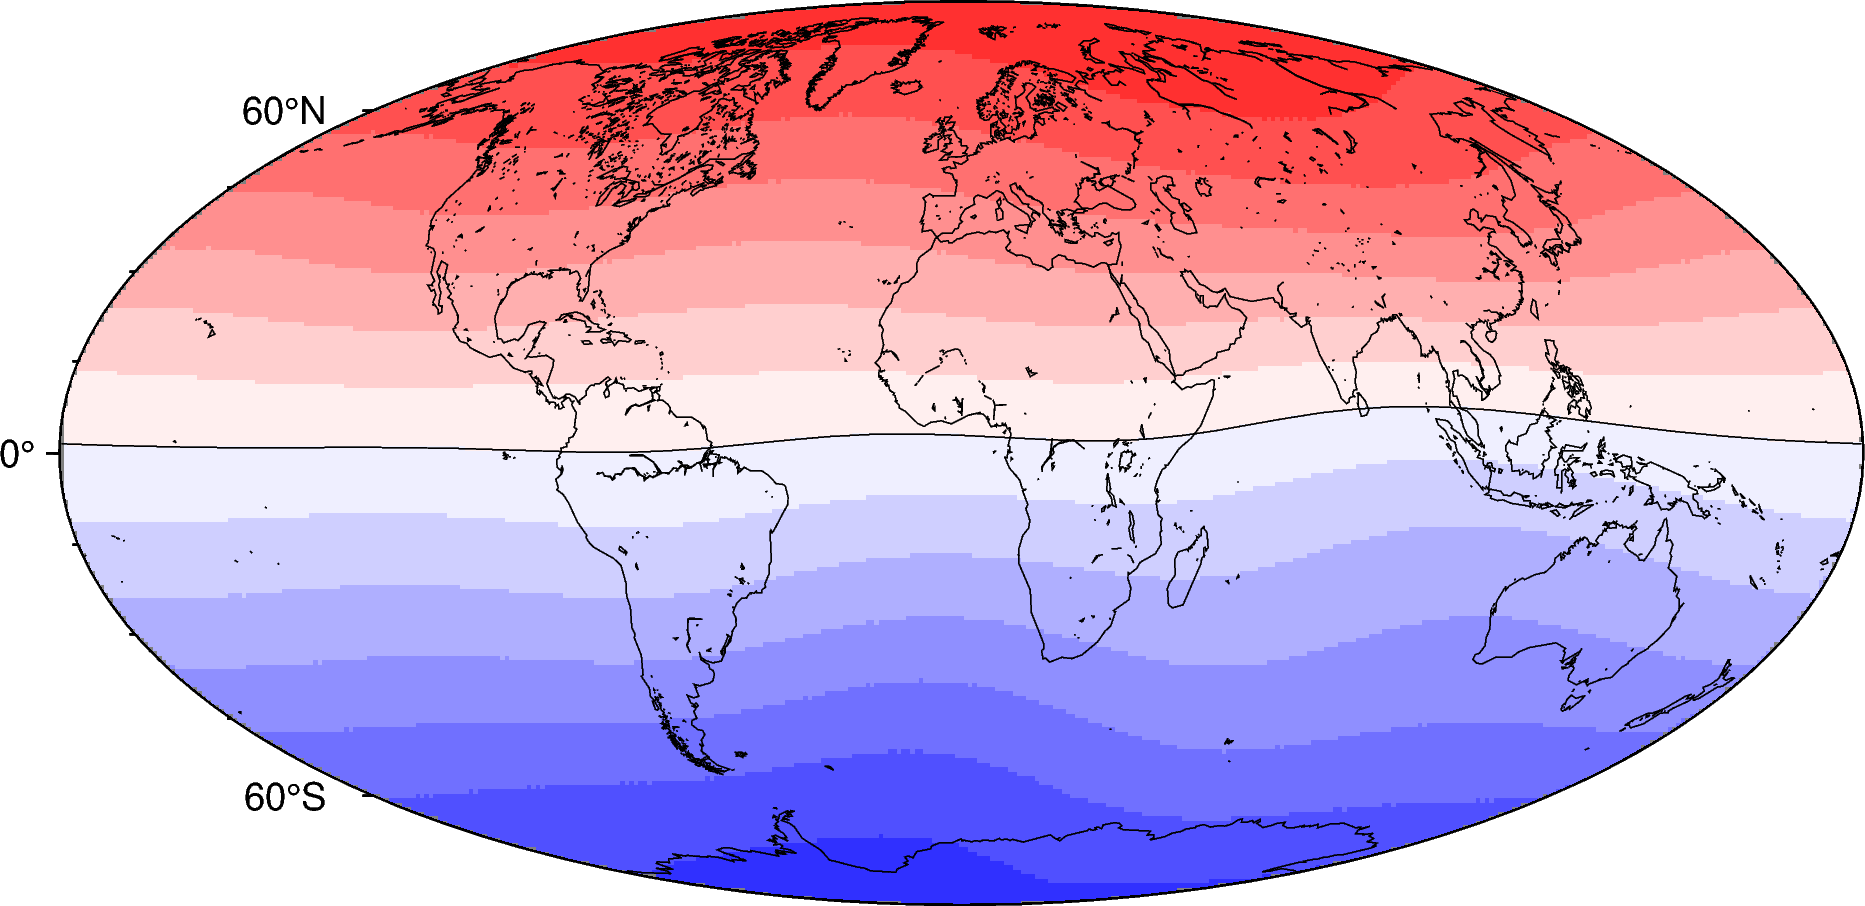

In [9]:
rad = KG97.expand(lmax=100, a=r0).rad.to_xarray()

fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')

pygmt.makecpt(cmap='polar', series=[-80000,80000,10000], background='o',reverse=True)
fig.grdimage(grid=rad, cmap=True)
fig.grdcontour(grid=rad, interval='0,')
fig.coast(shorelines='black')

fig.show(width=1000)

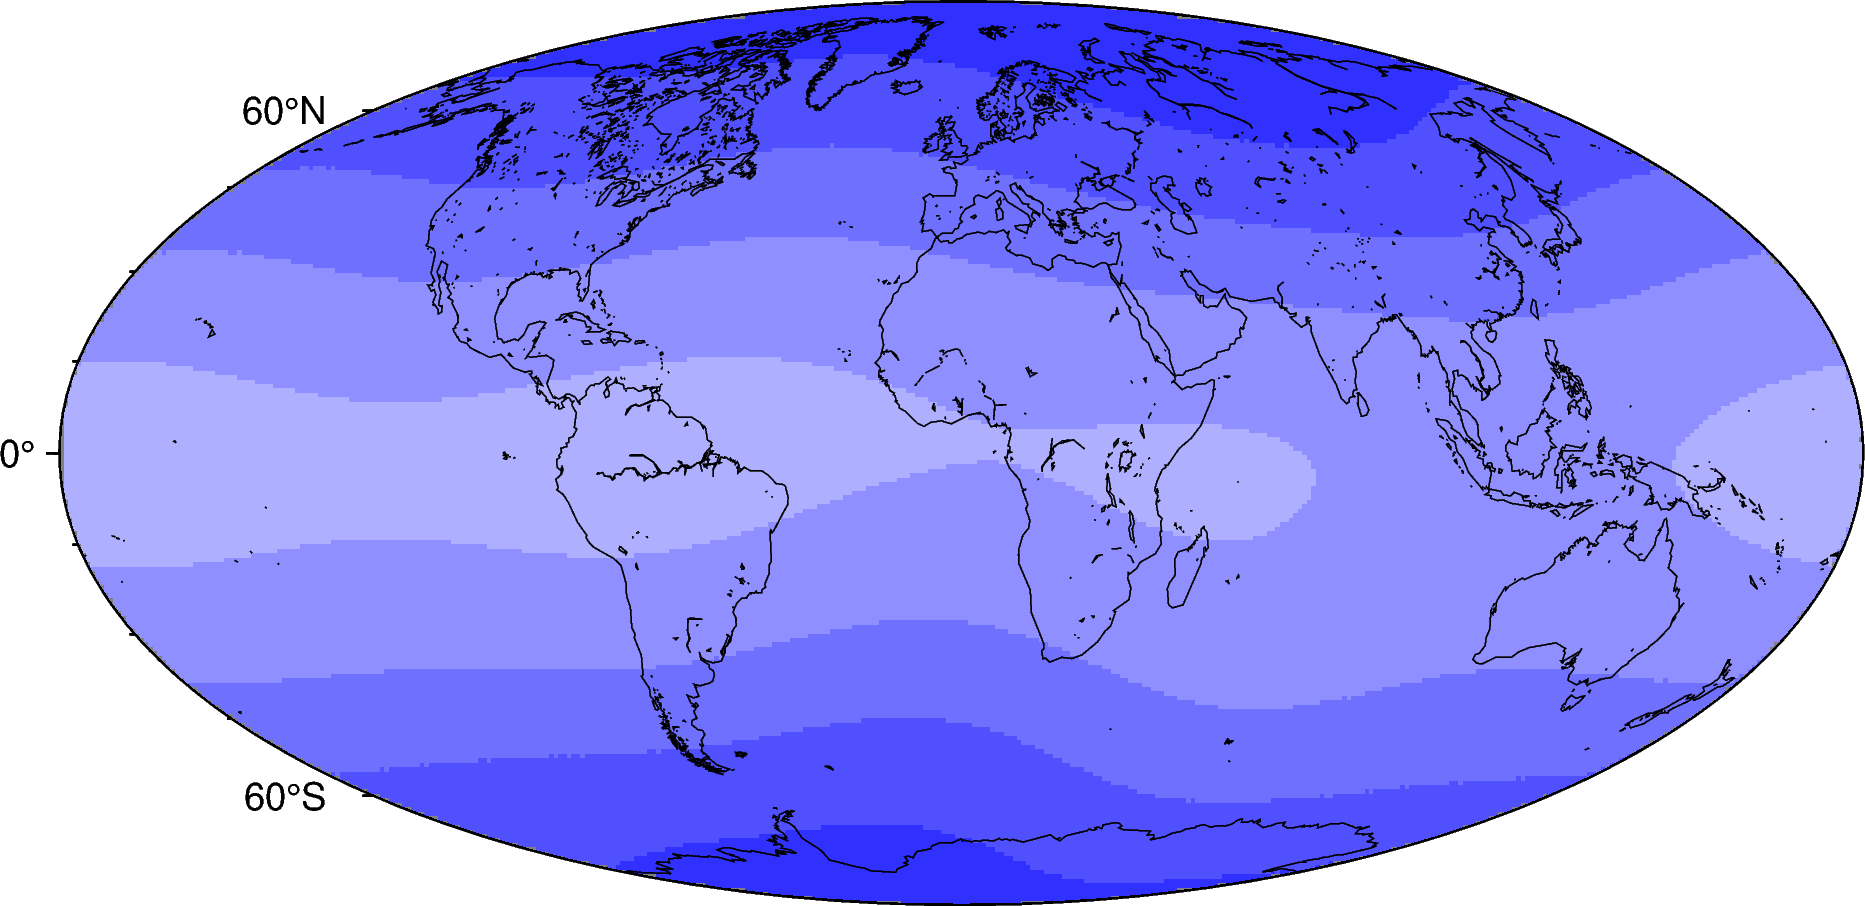

In [10]:
total = KG97.expand(lmax=100, a=r0).total.to_xarray()

fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')

pygmt.makecpt(cmap='polar', series=[-80000,80000,10000], background='o',reverse=True)
fig.grdimage(grid=total, cmap=True)
fig.grdcontour(grid=total, interval='0,')
fig.coast(shorelines='black')

fig.show(width=1000)

grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.
grdimage [WARNING]: Longitude range too small; geographic boundary condition changed to natural.


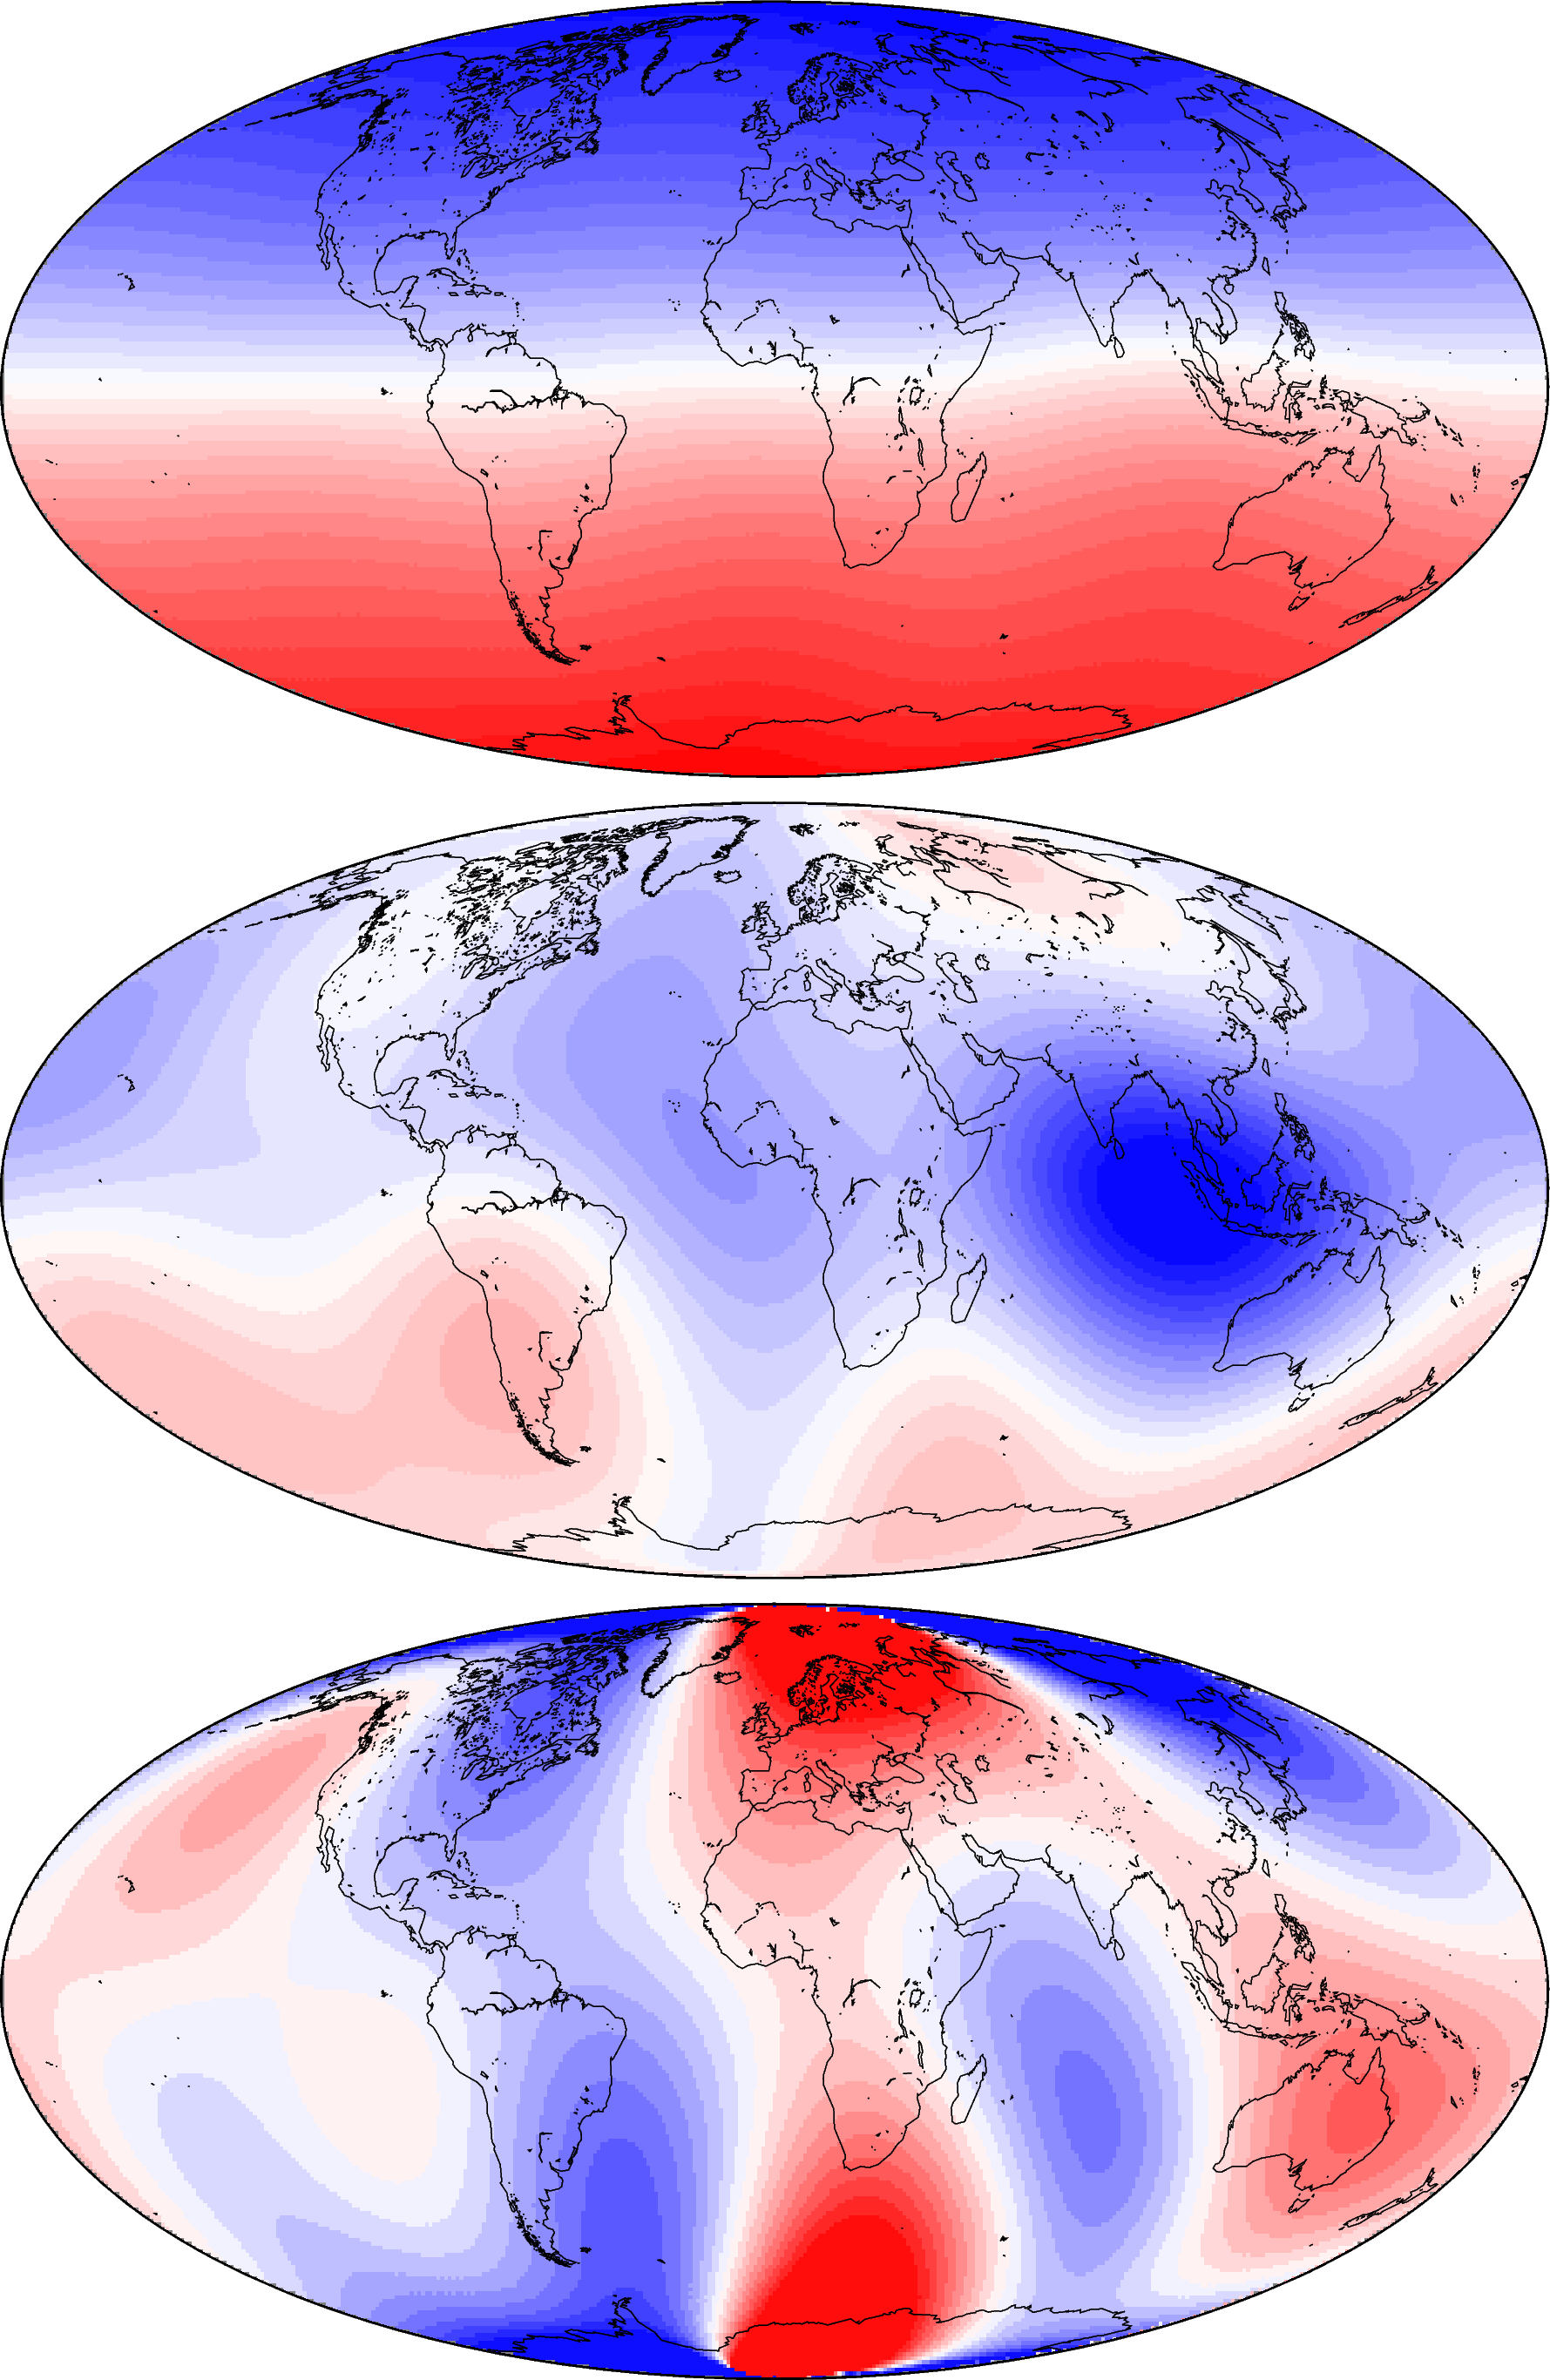

In [19]:
def mag_vector2incl_decl(x, y, z):
    """
    Inputs:
    -------
    vectors of the geomagnetic field.
    x: north componment
    y: east component
    z: down (by convention) component

    outputs:
    --------
    declination [degrees]
    inclination [degrees]

    http://geomag.nrcan.gc.ca/mag_fld/comp-en.php
    """

    decl = np.degrees(np.arctan2(y, x)) 

    incl = np.degrees(np.arctan2(z, np.hypot(x, y)))

    ind = decl>0
    decl.data[ind] = decl.data[ind]-180.
    decl.data[~ind] = decl.data[~ind]+180.
    decl.data = decl.data * -1
    #incl.data = incl.data * -1
    
    return decl, incl


KG97_expand = KG97.expand(lmax=100, a=r0)
dec,inc = mag_vector2incl_decl(KG97_expand.theta.to_xarray(), 
                               KG97_expand.phi.to_xarray(), 
                               KG97_expand.rad.to_xarray())

ad = axial_dipole.expand(lmax=100)
ad_dec,ad_inc = mag_vector2incl_decl(ad.theta.to_xarray(), ad.phi.to_xarray(), ad.rad.to_xarray())

inc_anomaly = ad_inc - inc

projection='W15c'
fig = pygmt.Figure()
with fig.subplot(nrows=3, ncols=1, figsize=("15c", "23c"), frame="lrtb"):
    
    with fig.set_panel(panel=0):
        fig.basemap(region='d', projection=projection, frame='afg')

        pygmt.makecpt(cmap='polar', series=[-90,90,5], background='o')
        fig.grdimage(grid=inc, cmap=True, region='d', projection=projection)
        #fig.grdcontour(grid=dec, interval='0,')
        fig.coast(shorelines='black', region='d', projection=projection)
        
    with fig.set_panel(panel=1):
        fig.basemap(region='d', projection=projection, frame='afg')

        pygmt.makecpt(cmap='polar', series=[-15,15,1], background='o')
        fig.grdimage(grid=inc_anomaly, cmap=True, region='d', projection=projection)
        #fig.grdcontour(grid=dec, interval='0,')
        fig.coast(shorelines='black', region='d', projection=projection)

    with fig.set_panel(panel=2):
        fig.basemap(region='d', projection=projection, frame='afg')

        pygmt.makecpt(cmap='polar', series=[-10,10,1], background='o')
        fig.grdimage(grid=dec, cmap=True, region='d', projection=projection)
        #fig.grdcontour(grid=dec, interval='0,')
        fig.coast(shorelines='black', region='d', projection=projection)
        
fig.show(width=700)


In [21]:
KG97.expand(lmax=100, a=r0).rad.to_netcdf('./KG97/KG97_rad_surface.nc')
KG97.expand(lmax=100, a=r0-2890000.).rad.to_netcdf('./KG97/KG97_rad_CMB.nc')
inc_anomaly.to_netcdf('./KG97/KG97_inclination_anomaly.nc')
dec.to_netcdf('./KG97/KG97_declination.nc')